In [1]:
import numpy as np
import json

data=[]
with open("test_HWU2.json", 'r', encoding="utf-8") as file:
    for line in file:
        j = json.loads(line.strip())
        data.append(j)
    # print(len(data))
    print(data[i]['sentence'] for i in range(len(data)))

<generator object <genexpr> at 0x7f19df16b900>


In [2]:
import torch 
from transformers import AutoTokenizer, AutoModel

x = [data[i]['sentence'] for i in range(len(data))]
print(x)
# model = torch.load('log_instance/HuffPost/K_1_C_5/01_save_estimate.pth', map_location=torch.device('cpu'))
model = torch.load('log_K_1_C_5/HWU64/K_1_C_5/02_save_estimate.pth', map_location=torch.device('cpu'))
# model = AutoModel.from_pretrained("bert-base-uncased")
# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("tdopierre/ProtAugment-LM-HWU64")
# tokenizer = AutoTokenizer.from_pretrained("tdopierre/ProtAugment-LM-BANKING77")

batch = tokenizer.batch_encode_plus(
            x,
            return_tensors="pt",
            max_length=64,
            truncation=True,
            padding=True,
        )
batch = {k: v for k, v in batch.items()}

batch['token_type_ids'] = torch.cat([torch.full((1,10+batch['input_ids'].shape[1]), 0)], 1).repeat(len(batch['input_ids']),1)
batch['attention_mask'] = torch.cat([torch.full((len(batch['input_ids']),10), 1), batch['attention_mask']], 1)  #soft prompt加在sentence前面
batch['input_ids'] = torch.cat([torch.full((len(batch['input_ids']),10), -1), batch['input_ids']], 1)  #soft prompt加在sentence前面

hidden = model.encoder.forward(**batch).last_hidden_state
# hidden = model(**batch).last_hidden_state
x_embeddings = hidden[:,10,:]
# hidden = model.encoder(**batch).last_hidden_state
# print(hidden.shape)
# x_embeddings = hidden[:,0,:] 
print(x_embeddings.shape)
# print(x_embeddings)

2023-06-28 22:44:32.916360: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 22:44:33.424481: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-28 22:44:33.424521: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-28 22:44:33.424526: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

['turn up sound', 'initiate polling for new email', 'book uber taxi for my travel', 'raise the volume of the speakers to fifty five percent', "add this person's email", 'can you turn up your volume', 'find out if the olive garden will let me do takeaway', 'did dan send me any emails', 'turn on silent mode until my alarm goes off', 'train times to glasgow', "i can't hear you", 'call me for this meeting', 'show todays reminders', 'show mobile number of john', 'lower the volume please', 'place order for a chicken manchow soup from wangs kitchen restaurant', 'please call a taxi to arrive at four hundred and take me to the manor theater', 'write down that i am going to meet with jenny on the third okay', 'google please be extra quiet the baby is sleeping', 'does fongs have delivery', 'will you please mute my speakers', 'please do not speak', 'is there a chili cookoff this weekend', 'show me the current traffic nearby me', 'what events are happening this weekend in my area', 'book a taxi', '

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1800 samples in 0.001s...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[t-SNE] Computed neighbors for 1800 samples in 0.761s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1800
[t-SNE] Computed conditional probabilities for sample 1800 / 1800
[t-SNE] Mean sigma: 2.335491
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.746056
[t-SNE] KL divergence after 1000 iterations: 0.885575
['8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '

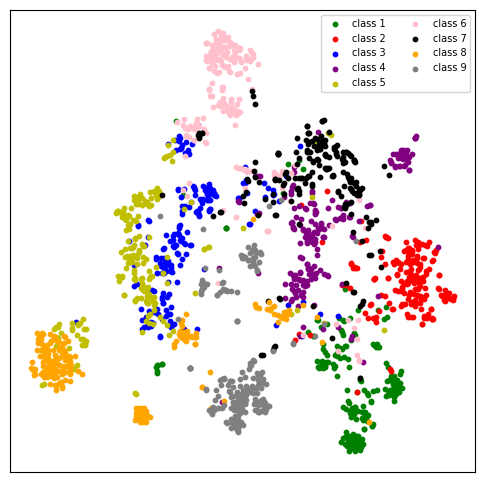

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(x_embeddings.detach().cpu())

x_min, x_max = tsne_proj.min(0), tsne_proj.max(0)
X_norm = (tsne_proj - x_min) / (x_max - x_min)  
plt.figure(figsize=(6, 6))

# customize your marker
# colors = ['b','g','c','m','k']
# markers = ['.','^']

msize = 40
y = [data[i]['label'] for i in range(len(data))]
# colors = cm.rainbow(np.linspace(0,1,len(y)))
print(y)
for i in range(tsne_proj.shape[0]):
    if y[i]== "8": # live
        a = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="g", s=msize, marker='.')
    elif y[i]== "4": # print
        b = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="r", s=msize, marker='.')
    elif y[i]== "10": # print
        c = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="b", s=msize, marker='.')
    elif y[i]== "18": # print
        d = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="purple", s=msize, marker='.')
    elif y[i]== "1": # print
        e = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="y", s=msize, marker='.')
    elif y[i]== "16": # print
        f = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    elif y[i]== "2": # print
        g = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    elif y[i]== "22": # print
        h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="orange", s=msize, marker='.')
    elif y[i]== "17": # print
        i = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="gray", s=msize, marker='.')
plt.legend((a, b, c, d, e, f, g, h, i),
           ('class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9'),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=7)

plt.xticks([])
plt.yticks([])
# plt.axis("off")
plt.savefig('amazon_estimate.png')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1799 samples in 0.002s...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[t-SNE] Computed neighbors for 1799 samples in 1.169s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1799
[t-SNE] Computed conditional probabilities for sample 1799 / 1799
[t-SNE] Mean sigma: 2.133599
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.138042
[t-SNE] KL divergence after 1000 iterations: 0.863526
['20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '20', '

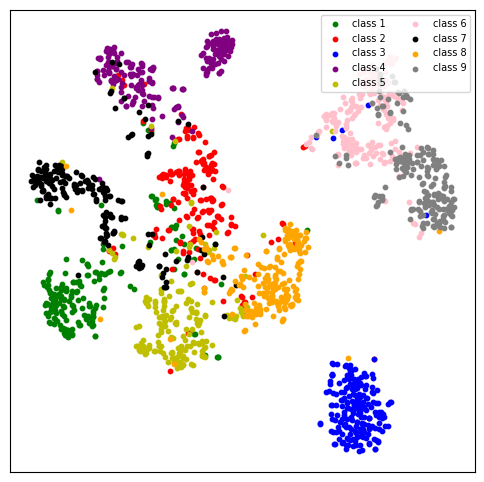

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(x_embeddings.detach().cpu())

x_min, x_max = tsne_proj.min(0), tsne_proj.max(0)
X_norm = (tsne_proj - x_min) / (x_max - x_min)  
plt.figure(figsize=(6, 6))

# customize your marker
# colors = ['b','g','c','m','k']
# markers = ['.','^']

msize = 40
y = [data[i]['label'] for i in range(len(data))]
# colors = cm.rainbow(np.linspace(0,1,len(y)))
print(y)
for i in range(tsne_proj.shape[0]):
    if y[i]== "20": # live
        a = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="g", s=msize, marker='.')
    elif y[i]== "12": # print
        b = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="r", s=msize, marker='.')
    elif y[i]== "23": # print
        c = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="b", s=msize, marker='.')
    elif y[i]== "11": # print
        d = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="purple", s=msize, marker='.')
    elif y[i]== "2": # print
        e = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="y", s=msize, marker='.')
    elif y[i]== "15": # print
        f = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    elif y[i]== "18": # print
        g = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    elif y[i]== "7": # print
        h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="orange", s=msize, marker='.')
    elif y[i]== "6": # print
        i = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="gray", s=msize, marker='.')
plt.legend((a, b, c, d, e, f, g, h, i),
           ('class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9'),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=7)

plt.xticks([])
plt.yticks([])
# plt.axis("off")
plt.savefig('amazon5_estimate.png')


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1800 samples in 0.002s...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[t-SNE] Computed neighbors for 1800 samples in 0.811s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1800
[t-SNE] Computed conditional probabilities for sample 1800 / 1800
[t-SNE] Mean sigma: 2.242413
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.727028
[t-SNE] KL divergence after 1000 iterations: 0.899823
['8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '

(-62.03403301239014, 59.33712215423584, -46.837046241760255, 45.69277057647705)

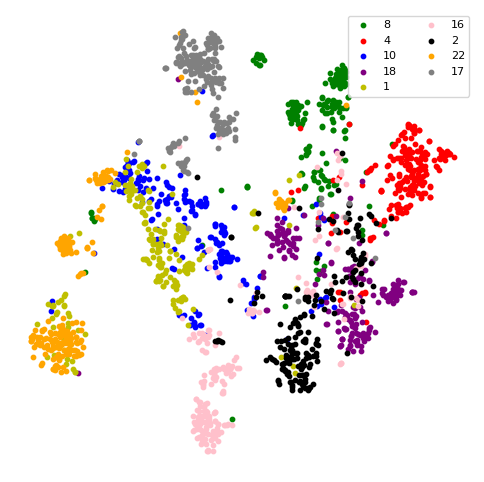

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(x_embeddings.detach().cpu())

x_min, x_max = tsne_proj.min(0), tsne_proj.max(0)
X_norm = (tsne_proj - x_min) / (x_max - x_min)  
plt.figure(figsize=(6, 6))

# customize your marker
# colors = ['b','g','c','m','k']
# markers = ['.','^']

msize = 40
y = [data[i]['label'] for i in range(len(data))]
# colors = cm.rainbow(np.linspace(0,1,len(y)))
print(y)
for i in range(tsne_proj.shape[0]):
    if y[i]== "8": # live
        a = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="g", s=msize, marker='.')
    elif y[i]== "4": # print
        b = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="r", s=msize, marker='.')
    elif y[i]== "10": # print
        c = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="b", s=msize, marker='.')
    elif y[i]== "18": # print
        d = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="purple", s=msize, marker='.')
    elif y[i]== "1": # print
        e = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="y", s=msize, marker='.')
    elif y[i]== "16": # print
        f = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    elif y[i]== "2": # print
        g = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    elif y[i]== "22": # print
        h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="orange", s=msize, marker='.')
    elif y[i]== "17": # print
        i = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="gray", s=msize, marker='.')
plt.legend((a, b, c, d, e, f, g, h, i),
           ('8', '4', '10', '18', '1', '16', '2', '22', '17'),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=8)

plt.xticks([])
plt.yticks([])
plt.axis("off")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[t-SNE] Computed neighbors for 1000 samples in 0.395s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.389959
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.138840
[t-SNE] KL divergence after 1000 iterations: 1.180577
['2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2

(-64.0030731201172, 75.36351623535157, -32.2796989440918, 33.78944549560547)

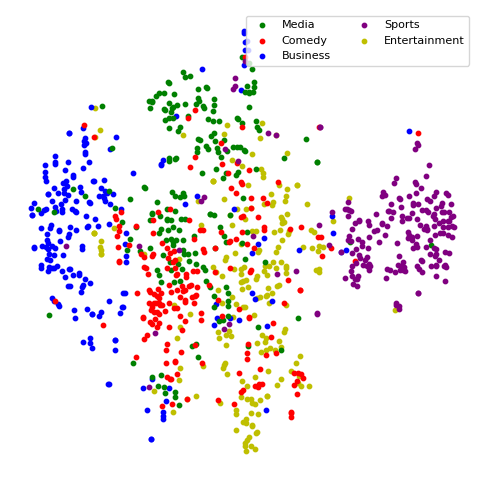

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(x_embeddings.detach().cpu())

x_min, x_max = tsne_proj.min(0), tsne_proj.max(0)
X_norm = (tsne_proj - x_min) / (x_max - x_min)  
plt.figure(figsize=(6, 6))

# customize your marker
# colors = ['b','g','c','m','k']
# markers = ['.','^']
msize = 40
y = [data[i]['label'] for i in range(len(data))]
print(y)
for i in range(tsne_proj.shape[0]):
    if y[i]== "21": # live
        a = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="g", s=msize, marker='.')
    elif y[i]== "10": # print
        b = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="r", s=msize, marker='.')
    elif y[i]== "9": # print
        c = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="b", s=msize, marker='.')
    elif y[i]== "11": # print
        d = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="purple", s=msize, marker='.')
    elif y[i]== "2": # print
        e = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="y", s=msize, marker='.')
plt.legend((a, b, c, d, e),
           ('Media', 'Comedy', 'Business', 'Sports', 'Entertainment'),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=8)

plt.xticks([])
plt.yticks([])
plt.axis("off")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3269 samples in 0.002s...
[t-SNE] Computed neighbors for 3269 samples in 0.111s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3269
[t-SNE] Computed conditional probabilities for sample 2000 / 3269
[t-SNE] Computed conditional probabilities for sample 3000 / 3269
[t-SNE] Computed conditional probabilities for sample 3269 / 3269
[t-SNE] Mean sigma: 2.200928
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.441406
[t-SNE] KL divergence after 1000 iterations: 1.018794
['audio/volume_up', 'email/query', 'transport/taxi', 'audio/volume_up', 'email/addcontact', 'audio/volume_up', 'takeaway/query', 'email/query', 'audio/volume_mute', 'transport/query', 'audio/volume_up', 'calendar/set', 'calendar/query', 'email/querycontact', 'audio/volume_down', 'takeaway/order', 'transport/taxi', 'calendar/set', 'audio/volume_mute', 'takeaway/query', 'audio/volume_mute', 'audio/volume_mute', 'calendar/query', 'tr

([], [])

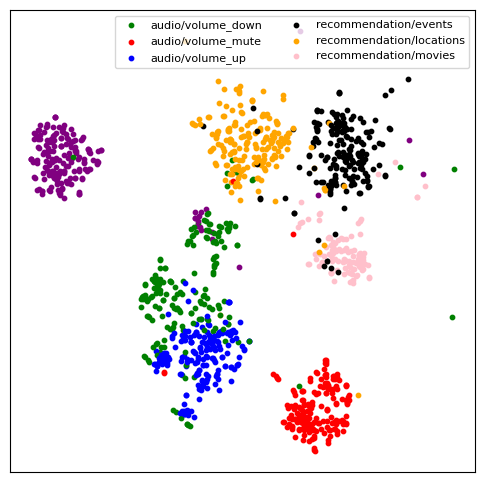

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(x_embeddings.detach().cpu())

x_min, x_max = tsne_proj.min(0), tsne_proj.max(0)
X_norm = (tsne_proj - x_min) / (x_max - x_min)  
plt.figure(figsize=(6, 6))

# customize your marker
# colors = ['b','g','c','m','k']
# markers = ['.','^']
msize = 40
y = [data[i]['label'] for i in range(len(data))]
print(y)
for i in range(tsne_proj.shape[0]):
    if y[i]== "transport/query": # live
        a = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="g", s=msize, marker='.')
    elif y[i]== "transport/taxi": # print
        b = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="r", s=msize, marker='.')
    elif y[i]== "transport/ticket": # print
        c = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="b", s=msize, marker='.')
    elif y[i]== "transport/traffic": # print
        d = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="purple", s=msize, marker='.')
    # elif y[i]== "iot/hue_lightup": # print
    #     e = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="y", s=msize, marker='.')
    elif y[i]== "recommendation/events": # print
        f = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    elif y[i]== "recommendation/locations": # print
        g = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="orange", s=msize, marker='.')
    elif y[i]== "recommendation/movies": # print
        h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
plt.legend((a, b, c, f, g, h),
           ('audio/volume_down', 'audio/volume_mute', 'audio/volume_up',  'recommendation/events', 'recommendation/locations', 'recommendation/movies'),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=8)

plt.xticks([])
plt.yticks([])
# plt.axis("off")
# plt.savefig('HWU5_estimate.png')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4904 samples in 0.003s...
[t-SNE] Computed neighbors for 4904 samples in 0.259s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4904
[t-SNE] Computed conditional probabilities for sample 2000 / 4904
[t-SNE] Computed conditional probabilities for sample 3000 / 4904
[t-SNE] Computed conditional probabilities for sample 4000 / 4904
[t-SNE] Computed conditional probabilities for sample 4904 / 4904
[t-SNE] Mean sigma: 1.929374
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.188789
[t-SNE] KL divergence after 1000 iterations: 0.856166
['music/settings', 'general/praise', 'cooking/recipe', 'play/music', 'iot/wemo_off', 'general/affirm', 'iot/cleaning', 'play/radio', 'general/praise', 'play/radio', 'general/negate', 'iot/hue_lightdim', 'iot/hue_lightoff', 'weather/query', 'play/game', 'play/audiobook', 'iot/hue_lightdim', 'general/repeat', 'play/radio', 'general/praise', 'iot/wemo_off', 'iot/coffee

(-47.94758071899414, 88.03194656372071, -77.78878631591797, 74.94679107666016)

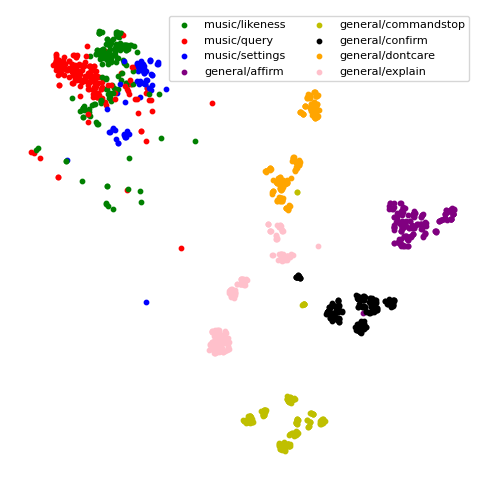

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(x_embeddings.detach().cpu())

x_min, x_max = tsne_proj.min(0), tsne_proj.max(0)
X_norm = (tsne_proj - x_min) / (x_max - x_min)  
plt.figure(figsize=(6, 6))

# customize your marker
# colors = ['b','g','c','m','k']
# markers = ['.','^']
msize = 40
y = [data[i]['label'] for i in range(len(data))]
print(y)
for i in range(tsne_proj.shape[0]):
    if y[i]== "music/likeness": # live
        a = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="g", s=msize, marker='.')
    elif y[i]== "music/query": # print
        b = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="r", s=msize, marker='.')
    elif y[i]== "music/settings": # print
        c = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="b", s=msize, marker='.')
    elif y[i]== "general/affirm": # print
        d = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="purple", s=msize, marker='.')
    elif y[i]== "general/commandstop": # print
        e = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="y", s=msize, marker='.')
    elif y[i]== "general/confirm": # print
        f = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    elif y[i]== "general/dontcare": # print
        g = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="orange", s=msize, marker='.')
    elif y[i]== "general/explain": # print
        h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    # elif y[i]== "social/query": # print
    #     j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    # elif y[i]== "general/quirky": # print
    #     k = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    # elif y[i]== "general/repeat": # print
    #     h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
plt.legend((a, b, c, d, e, f, g, h),
           ('music/likeness', 'music/query', 'music/settings', 'general/affirm', 'general/commandstop', 'general/confirm', 'general/dontcare', 'general/explain'),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=8)

plt.xticks([])
plt.yticks([])
plt.axis("off")




[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4904 samples in 0.003s...
[t-SNE] Computed neighbors for 4904 samples in 0.189s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4904
[t-SNE] Computed conditional probabilities for sample 2000 / 4904
[t-SNE] Computed conditional probabilities for sample 3000 / 4904
[t-SNE] Computed conditional probabilities for sample 4000 / 4904
[t-SNE] Computed conditional probabilities for sample 4904 / 4904
[t-SNE] Mean sigma: 1.929374
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.192307
[t-SNE] KL divergence after 1000 iterations: 0.852797
['music/settings', 'general/praise', 'cooking/recipe', 'play/music', 'iot/wemo_off', 'general/affirm', 'iot/cleaning', 'play/radio', 'general/praise', 'play/radio', 'general/negate', 'iot/hue_lightdim', 'iot/hue_lightoff', 'weather/query', 'play/game', 'play/audiobook', 'iot/hue_lightdim', 'general/repeat', 'play/radio', 'general/praise', 'iot/wemo_off', 'iot/coffee

(-47.20495719909668, 44.31674308776856, -37.58766593933105, 77.56448020935059)

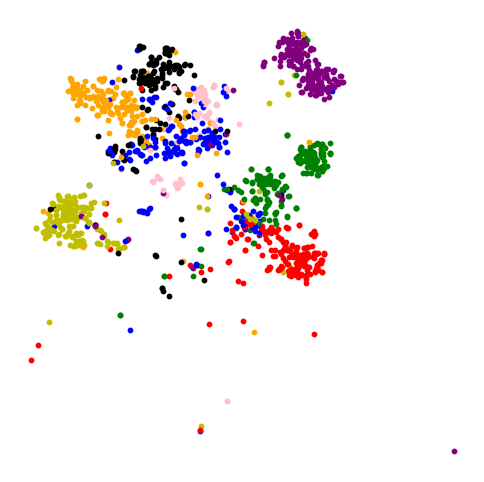

: 

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(x_embeddings.detach().cpu())

x_min, x_max = tsne_proj.min(0), tsne_proj.max(0)
X_norm = (tsne_proj - x_min) / (x_max - x_min)  
plt.figure(figsize=(6, 6))

# customize your marker
# colors = ['b','g','c','m','k']
# markers = ['.','^']
msize = 40
y = [data[i]['label'] for i in range(len(data))]
print(y)
for i in range(tsne_proj.shape[0]):
    if y[i]== "play/audiobook": # live
        a = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="g", s=msize, marker='.')
    elif y[i]== "play/game": # print
        b = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="r", s=msize, marker='.')
    elif y[i]== "play/music": # print
        c = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="b", s=msize, marker='.')
    elif y[i]== "play/podcasts": # print
        d = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="purple", s=msize, marker='.')
    elif y[i]== "play/radio": # print
        e = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="y", s=msize, marker='.')
    elif y[i]== "music/likeness": # print
        f = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    elif y[i]== "music/query": # print
        g = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="orange", s=msize, marker='.')
    elif y[i]== "music/settings": # print
        h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    # elif y[i]== "iot/wemo_on": # print
    #     j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="yellowgreen", s=msize, marker='.')
    # elif y[i]== "music/likeness": # print
    #     k = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="plum", s=msize, marker='.')
    # elif y[i]== "music/query": # print
    #     h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="beige", s=msize, marker='.')
# plt.legend((a, b, c, d, e, f, g, h),
#            ('music/likeness', 'music/query', 'music/settings', 'general/affirm', 'general/commandstop', 'general/confirm', 'general/dontcare', 'general/explain'),
#            scatterpoints=1,
#            loc='upper right',
#            ncol=2,
#            fontsize=8)

plt.xticks([])
plt.yticks([])
plt.axis("off")

# iot/cleaning
# iot/coffee
# iot/hue_lightchange
# iot/hue_lightdim
# iot/hue_lightoff
# iot/hue_lighton
# iot/hue_lightup
# iot/wemo_off
# iot/wemo_on
# music/likeness
# music/query
# music/settings
# play/audiobook
# play/game
# play/music
# play/podcasts
# play/radio
# weather/query


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3972 samples in 0.003s...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[t-SNE] Computed neighbors for 3972 samples in 0.935s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3972
[t-SNE] Computed conditional probabilities for sample 2000 / 3972
[t-SNE] Computed conditional probabilities for sample 3000 / 3972
[t-SNE] Computed conditional probabilities for sample 3972 / 3972
[t-SNE] Mean sigma: 2.066530
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.729843
[t-SNE] KL divergence after 1000 iterations: 0.923821
['iot/hue_lightoff', 'iot/hue_lightup', 'iot/hue_lightoff', 'iot/cleaning', 'iot/coffee', 'qa/currency', 'date

NameError: name 'calendar' is not defined

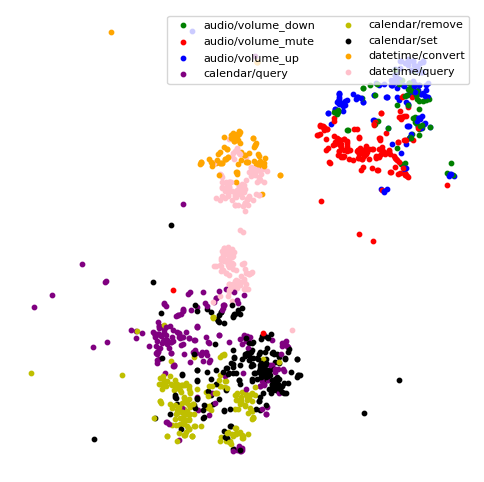

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(x_embeddings.detach().cpu())

x_min, x_max = tsne_proj.min(0), tsne_proj.max(0)
X_norm = (tsne_proj - x_min) / (x_max - x_min)  
plt.figure(figsize=(6, 6))

# customize your marker
# colors = ['b','g','c','m','k']
# markers = ['.','^']
msize = 40
y = [data[i]['label'] for i in range(len(data))]
print(y)
for i in range(tsne_proj.shape[0]):
    if y[i]== "audio/volume_down": # live
        a = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="g", s=msize, marker='.')
    elif y[i]== "audio/volume_mute": # print
        b = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="r", s=msize, marker='.')
    elif y[i]== "audio/volume_up": # print
        c = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="b", s=msize, marker='.')
    elif y[i]== "calendar/query": # print
        d = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="purple", s=msize, marker='.')
    elif y[i]== "calendar/remove": # print
        e = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="y", s=msize, marker='.')
    elif y[i]== "calendar/set": # print
        f = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    elif y[i]== "datetime/convert": # print
        g = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="orange", s=msize, marker='.')
    elif y[i]== "datetime/query": # print
        h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    # elif y[i]== "social/query": # print
    #     j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    # elif y[i]== "general/quirky": # print
    #     k = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    # elif y[i]== "general/repeat": # print
    #     h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
plt.legend((a, b, c, d, e, f, g, h),
           ('audio/volume_down', 'audio/volume_mute', 'audio/volume_up', 'calendar/query', 'calendar/remove', 'calendar/set', 'datetime/convert', 'datetime/query'),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=8)

plt.xticks([])
plt.yticks([])
plt.axis("off")


calendar/query
calendar/remove
calendar/set
email/addcontact
email/query
email/querycontact
email/sendemail
recommendation/events
recommendation/locations
recommendation/movies
takeaway/order
takeaway/query
transport/query
transport/taxi
transport/ticket
transport/traffic



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3972 samples in 0.002s...
[t-SNE] Computed neighbors for 3972 samples in 0.139s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3972
[t-SNE] Computed conditional probabilities for sample 2000 / 3972
[t-SNE] Computed conditional probabilities for sample 3000 / 3972
[t-SNE] Computed conditional probabilities for sample 3972 / 3972
[t-SNE] Mean sigma: 2.066530
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.729736
[t-SNE] KL divergence after 1000 iterations: 0.923836
['iot/hue_lightoff', 'iot/hue_lightup', 'iot/hue_lightoff', 'iot/cleaning', 'iot/coffee', 'qa/currency', 'datetime/query', 'calendar/query', 'iot/hue_lightup', 'lists/query', 'lists/remove', 'qa/factoid', 'iot/wemo_on', 'qa/currency', 'audio/volume_up', 'audio/volume_up', 'qa/definition', 'iot/hue_lightchange', 'lists/remove', 'iot/wemo_on', 'qa/definition', 'calendar/set', 'qa/factoid', 'lists/query', 'audio/volume_up', 'iot/hue_

(-47.88355121612549, 48.28140506744385, -46.89685173034668, 61.583321762084964)

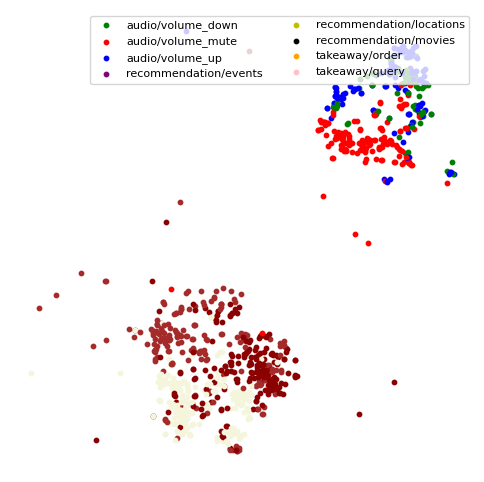

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(x_embeddings.detach().cpu())

x_min, x_max = tsne_proj.min(0), tsne_proj.max(0)
X_norm = (tsne_proj - x_min) / (x_max - x_min)  
plt.figure(figsize=(6, 6))

# customize your marker
# colors = ['b','g','c','m','k']
# markers = ['.','^']
msize = 40
y = [data[i]['label'] for i in range(len(data))]
print(y)
for i in range(tsne_proj.shape[0]):
    if y[i]== "audio/volume_down": # live
        a = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="g", s=msize, marker='.')
    elif y[i]== "audio/volume_mute": # print
        b = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="r", s=msize, marker='.')
    elif y[i]== "audio/volume_up": # print
        c = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="b", s=msize, marker='.')
    elif y[i]== "recommendation/events": # print
        d = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="purple", s=msize, marker='.')
    elif y[i]== "recommendation/locations": # print
        e = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="y", s=msize, marker='.')
    elif y[i]== "recommendation/movies": # print
        f = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    elif y[i]== "takeaway/order": # print
        g = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="orange", s=msize, marker='.')
    elif y[i]== "takeaway/query": # print
        h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    elif y[i]== "calendar/query": # print
        j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="brown", s=msize, marker='.')
    elif y[i]== "calendar/remove": # print
        l = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="beige", s=msize, marker='.')
    elif y[i]== "calendar/set": # print
        m = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="darkred", s=msize, marker='.')
    elif y[i]== "email/addcontact": # print
        n = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="darkorange", s=msize, marker='.')
    elif y[i]== "email/query": # print
        o = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="plum", s=msize, marker='.')
    elif y[i]== "email/querycontact": # print
        p = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="dimgray", s=msize, marker='.')
    elif y[i]== "email/sendemail": # print
        q = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="greenyellow", s=msize, marker='.')
    # elif y[i]== "calendar/query": # print
    #     q = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="darkgreen", s=msize, marker='.')
    # elif y[i]== "calendar/remove": # print
    #     q = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="darkgray", s=msize, marker='.')
    # elif y[i]== "calendar/set": # print
    #     q = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="darkyellow", s=msize, marker='.')
    elif y[i]== "transport/query": # print
        q = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="yellow", s=msize, marker='.')
    elif y[i]== "transport/taxi": # print
        q = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="darkgreen", s=msize, marker='.')
    elif y[i]== "transport/ticket": # print
        q = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="darkblue", s=msize, marker='.')
    elif y[i]== "transport/traffic": # print
        q = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="darkgray", s=msize, marker='.')
    # elif y[i]== "calendar/set": # print
    #     h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
plt.legend((a, b, c, d, e, f, g, h),
           ('audio/volume_down', 'audio/volume_mute', 'audio/volume_up', 'recommendation/events', 'recommendation/locations', 'recommendation/movies', 'takeaway/order', 'takeaway/query'),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=8)

plt.xticks([])
plt.yticks([])
plt.axis("off")



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2500 samples in 0.002s...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[t-SNE] Computed neighbors for 2500 samples in 1.140s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 2.771951
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.985886
[t-SNE] KL divergence after 1000 iterations: 0.584092
['apple_pay_or_google_pay', 'balance_not_updated_after_bank_transfer', 'receiving_money', 'exchange_charge', 'pending_card_payment', 'card_not_working', 'order_physical_card', 

(-72.95267066955566, 71.53805122375488, -60.18586463928223, 64.66464729309082)

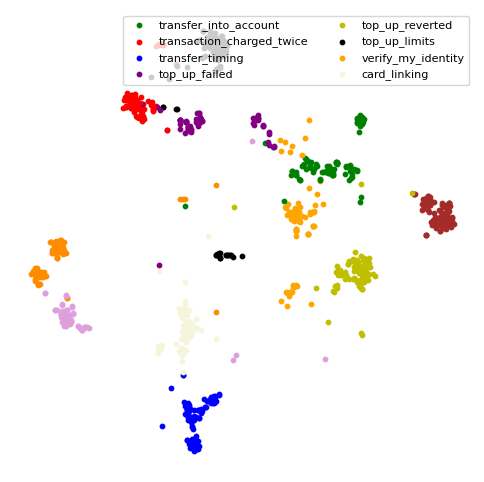

: 

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(x_embeddings.detach().cpu())

x_min, x_max = tsne_proj.min(0), tsne_proj.max(0)
X_norm = (tsne_proj - x_min) / (x_max - x_min)  
plt.figure(figsize=(6, 6))

# customize your marker
# colors = ['b','g','c','m','k']
# markers = ['.','^']
msize = 40
y = [data[i]['label'] for i in range(len(data))]
print(y)
for i in range(tsne_proj.shape[0]):
    if y[i]== "balance_not_updated_after_bank_transfer": # live
        a = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="g", s=msize, marker='.')
    elif y[i]== "fiat_currency_support": # print
        b = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="r", s=msize, marker='.')
    elif y[i]== "card_linking": # print
        c = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="b", s=msize, marker='.')
    elif y[i]== "receiving_money": # print
        d = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="purple", s=msize, marker='.')
    elif y[i]== "pending_card_payment": # print
        e = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="y", s=msize, marker='.')
    elif y[i]== "wrong_exchange_rate_for_cash_withdrawal": # print
        f = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    elif y[i]== "declined_transfer": # print
        g = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="orange", s=msize, marker='.')
    elif y[i]== "order_physical_card": # print
        h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="beige", s=msize, marker='.')
    elif y[i]== "Refund_not_showing_up": # print
        j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="brown", s=msize, marker='.')
    elif y[i]== "verify_top_up": # print
        k = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="darkorange", s=msize, marker='.')
    elif y[i]== "unable_to_verify_identity": # print
        h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="plum", s=msize, marker='.')
plt.legend((a, b, c, d, e, f, g, h),
           ('transfer_into_account', 'transaction_charged_twice', 'transfer_timing', 'top_up_failed', 'top_up_reverted', 'top_up_limits', 'verify_my_identity', 'card_linking'),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=8)

plt.xticks([])
plt.yticks([])
plt.axis("off")



# get_disposable_virtual_card
# declined_cash_withdrawal
# pending_transfer
# apple_pay_or_google_pay
# topping_up_by_card
# card_arrival
# declined_card_payment
# pending_top_up
# top_up_limits
# top_up_by_card_charge
# transaction_charged_twice
# card_not_working
# exchange_charge
# beneficiary_not_allowed
# virtual_card_not_working
# card_payment_not_recognised




[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.002s...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[t-SNE] Computed neighbors for 3000 samples in 1.346s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 2.632617
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.027267
[t-SNE] KL divergence after 1000 iterations: 0.579940
['pending_cash_withdrawal', 'transaction_charged_twice', 'transfer_fee_charged', 'verify_top_up', 'verify_top_up', 'top_up_failed', 'verify_my_identity', 'top_up_failed', 'unab

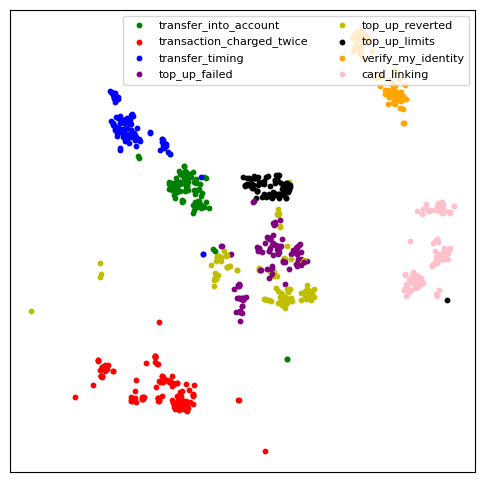

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(x_embeddings.detach().cpu())

x_min, x_max = tsne_proj.min(0), tsne_proj.max(0)
X_norm = (tsne_proj - x_min) / (x_max - x_min)  
plt.figure(figsize=(6, 6))

# customize your marker
# colors = ['b','g','c','m','k']
# markers = ['.','^']
msize = 40
y = [data[i]['label'] for i in range(len(data))]
print(y)
for i in range(tsne_proj.shape[0]):
    if y[i]== "transfer_into_account": # live
        a = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="g", s=msize, marker='.')
    elif y[i]== "transaction_charged_twice": # print
        b = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="r", s=msize, marker='.')
    elif y[i]== "transfer_timing": # print
        c = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="b", s=msize, marker='.')
    elif y[i]== "top_up_failed": # print
        d = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="purple", s=msize, marker='.')
    elif y[i]== "top_up_reverted": # print
        e = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="y", s=msize, marker='.')
    elif y[i]== "top_up_limits": # print
        f = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    elif y[i]== "verify_my_identity": # print
        g = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="orange", s=msize, marker='.')
    elif y[i]== "card_linking": # print
        h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    # elif y[i]== "Refund_not_showing_up": # print
    #     j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="brown", s=msize, marker='.')
    # elif y[i]== "verify_top_up": # print
    #     k = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="darkorange", s=msize, marker='.')
    # elif y[i]== "unable_to_verify_identity": # print
    #     h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="plum", s=msize, marker='.')
plt.legend((a, b, c, d, e, f, g, h),
           ('transfer_into_account', 'transaction_charged_twice', 'transfer_timing', 'top_up_failed', 'top_up_reverted', 'top_up_limits', 'verify_my_identity', 'card_linking'),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=8)

plt.xticks([])
plt.yticks([])
# plt.axis("off")
plt.savefig('banking_estimate.png')



# get_disposable_virtual_card
# declined_cash_withdrawal
# pending_transfer
# apple_pay_or_google_pay
# topping_up_by_card
# card_arrival
# declined_card_payment
# pending_top_up
# top_up_limits
# top_up_by_card_charge
# transaction_charged_twice
# card_not_working
# exchange_charge
# beneficiary_not_allowed
# virtual_card_not_working
# card_payment_not_recognised




[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.001s...
[t-SNE] Computed neighbors for 1600 samples in 0.045s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 2.496623
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.215630
[t-SNE] KL divergence after 1000 iterations: 1.212339
['11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '

(-46.594395065307616,
 52.795689010620116,
 -55.944601440429686,
 49.76553955078125)

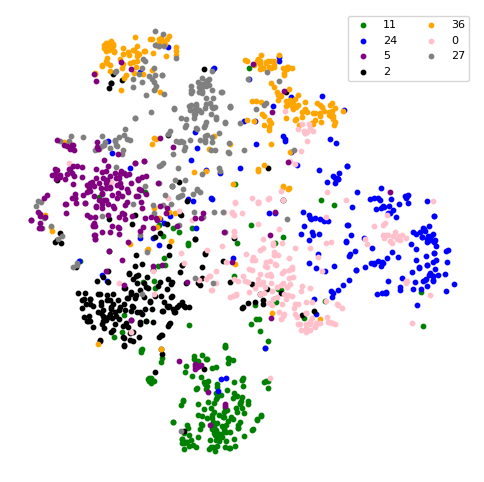

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(x_embeddings.detach().cpu())

x_min, x_max = tsne_proj.min(0), tsne_proj.max(0)
X_norm = (tsne_proj - x_min) / (x_max - x_min)  
plt.figure(figsize=(6, 6))

# customize your marker
# colors = ['b','g','c','m','k']
# markers = ['.','^']
msize = 40
y = [data[i]['label'] for i in range(len(data))]
print(y)
for i in range(tsne_proj.shape[0]):
    if y[i]== "11": # live
        a = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="g", s=msize, marker='.')
    # elif y[i]== "15": # print
    #     b = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="r", s=msize, marker='.')
    elif y[i]== "24": # print
        c = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="b", s=msize, marker='.')
    elif y[i]== "5": # print
        d = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="purple", s=msize, marker='.')
    # elif y[i]== "2": # print
    #     e = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="y", s=msize, marker='.')
    elif y[i]== "2": # print
        f = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    elif y[i]== "36": # print
        g = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="orange", s=msize, marker='.')
    elif y[i]== "0": # print
        h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    elif y[i]== "27": # print
        j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="gray", s=msize, marker='.')
plt.legend((a, c, d, f, g, h, j),
           ('11', '24', '5', '2', '36', '0', '27'),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=8)

plt.xticks([])
plt.yticks([])
plt.axis("off")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.001s...
[t-SNE] Computed neighbors for 1600 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 2.311881
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.265816
[t-SNE] KL divergence after 1000 iterations: 1.357929
['29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '

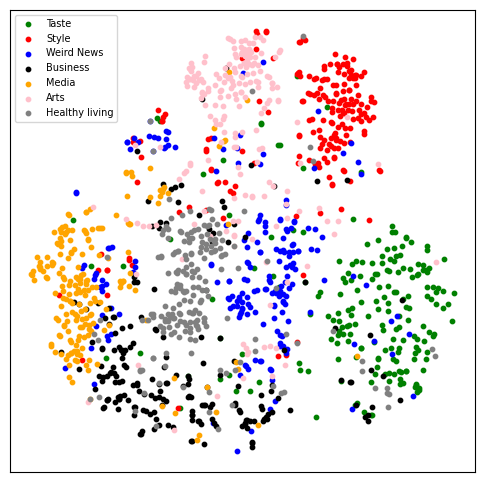

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(x_embeddings.detach().cpu())

x_min, x_max = tsne_proj.min(0), tsne_proj.max(0)
X_norm = (tsne_proj - x_min) / (x_max - x_min)  
plt.figure(figsize=(6, 6))

# customize your marker
# colors = ['b','g','c','m','k']
# markers = ['.','^']
msize = 40
y = [data[i]['label'] for i in range(len(data))]
print(y)
for i in range(tsne_proj.shape[0]):
    if y[i]== "29": # live
        a = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="g", s=msize, marker='.')
    elif y[i]== "26": # print
        b = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="r", s=msize, marker='.')
    elif y[i]== "22": # print
        c = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="b", s=msize, marker='.')
    elif y[i]== "9": # print
        d = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    elif y[i]== "21": # print
        e = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="orange", s=msize, marker='.')
    elif y[i]== "32": # print
        f = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    elif y[i]== "6": # print
        g = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="gray", s=msize, marker='.')
    # elif y[i]== "0": # print
    #     h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    # elif y[i]== "27": # print
    #     j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="gray", s=msize, marker='.')
plt.legend((a, b, c, d, e, f, g),
           ('Taste', 'Style', 'Weird News', 'Business', 'Media', 'Arts', 'Healthy living'),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=7)

plt.xticks([])
plt.yticks([])
plt.savefig('huffpost5_estimate.png')
# plt.axis("off")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.002s...
[t-SNE] Computed neighbors for 3000 samples in 0.108s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 2.194371
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.203468
[t-SNE] KL divergence after 1000 iterations: 1.526673
['15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '

(-62.70089454650879,
 62.74379463195801,
 -62.026510620117186,
 57.324362182617186)

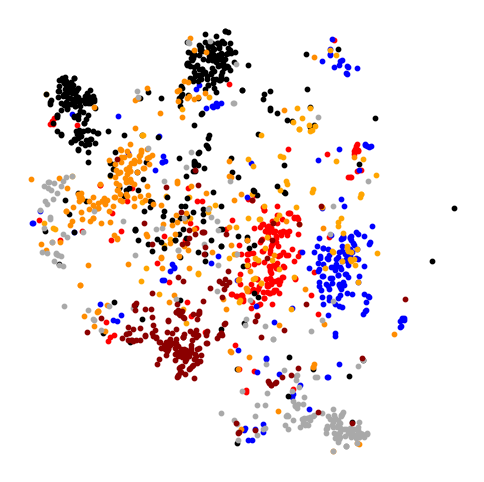

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(x_embeddings.detach().cpu())

x_min, x_max = tsne_proj.min(0), tsne_proj.max(0)
X_norm = (tsne_proj - x_min) / (x_max - x_min)  
plt.figure(figsize=(6, 6))

# customize your marker
# colors = ['b','g','c','m','k']
# markers = ['.','^']
msize = 40
y = [data[i]['label'] for i in range(len(data))]
print(y)
for i in range(tsne_proj.shape[0]):
    # if y[i]== "15": # live
    #     a = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="g", s=msize, marker='.')
    if y[i]== "2": # print
        b = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="r", s=msize, marker='.')
    elif y[i]== "20": # print
        c = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="b", s=msize, marker='.')
    # elif y[i]== "22": # print
    #     d = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="purple", s=msize, marker='.')
    # elif y[i]== "24": # print
    #     e = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="y", s=msize, marker='.')
    elif y[i]== "40": # print
        f = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    elif y[i]== "12": # print
        g = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="orange", s=msize, marker='.')
    # elif y[i]== "33": # print
    #     h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    # elif y[i]== "28": # print
    #     j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="brown", s=msize, marker='.')
    # elif y[i]== "1": # print
    #     j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="gray", s=msize, marker='.')
    elif y[i]== "19": # print
        j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    # elif y[i]== "38": # print
    #     j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="plum", s=msize, marker='.')
    # elif y[i]== "18": # print
    #     j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="yellowgreen", s=msize, marker='.')
    elif y[i]== "5": # print
        j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="darkorange", s=msize, marker='.')
    elif y[i]== "27": # print
        j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="darkgray", s=msize, marker='.')
    elif y[i]== "13": # print
        j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="darkred", s=msize, marker='.')
# plt.legend((a, b, c, d, f, g, h, j),
#            ('30', '12', '13', '34', '6', '28', '9', '5'),
#            scatterpoints=1,
#            loc='upper right',
#            ncol=2,
#            fontsize=8)

plt.xticks([])
plt.yticks([])
plt.axis("off")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2500 samples in 0.002s...
[t-SNE] Computed neighbors for 2500 samples in 0.074s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 2.271580
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.556976
[t-SNE] KL divergence after 1000 iterations: 1.512414
['29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '

(-56.39330501556397, 57.932989311218265, -50.19459171295166, 62.95656604766846)

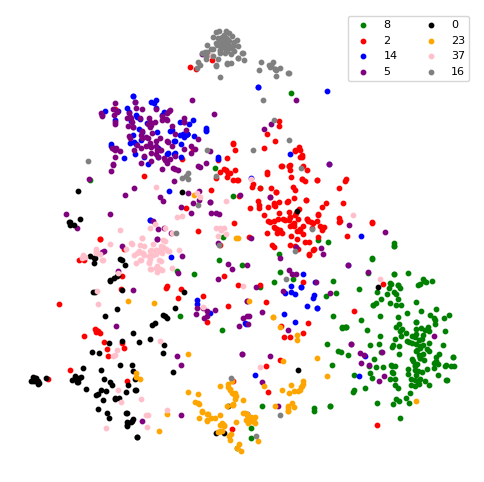

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(x_embeddings.detach().cpu())

x_min, x_max = tsne_proj.min(0), tsne_proj.max(0)
X_norm = (tsne_proj - x_min) / (x_max - x_min)  
plt.figure(figsize=(6, 6))

# customize your marker
# colors = ['b','g','c','m','k']
# markers = ['.','^']
msize = 40
y = [data[i]['label'] for i in range(len(data))]
print(y)
for i in range(tsne_proj.shape[0]):
    if y[i]== "8": # live
        a = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="g", s=msize, marker='.')
    elif y[i]== "2": # print
        b = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="r", s=msize, marker='.')
    elif y[i]== "14": # print
        c = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="b", s=msize, marker='.')
    elif y[i]== "5": # print
        d = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="purple", s=msize, marker='.')
    # elif y[i]== "12": # print
    #     e = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="y", s=msize, marker='.')
    elif y[i]== "0": # print
        f = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    elif y[i]== "23": # print
        g = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="orange", s=msize, marker='.')
    elif y[i]== "37": # print
        h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    elif y[i]== "16": # print
        j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="gray", s=msize, marker='.')
plt.legend((a, b, c, d, f, g, h, j),
           ('8', '2', '14', '5', '0', '23', '37', '16'),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=8)

plt.xticks([])
plt.yticks([])
plt.axis("off")


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.002s...
[t-SNE] Computed neighbors for 3000 samples in 0.136s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 2.195203
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.571945
[t-SNE] KL divergence after 1000 iterations: 1.649448
['30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '30', '

(-52.75541324615479, 61.55019397735596, -58.73523597717285, 60.339957046508786)

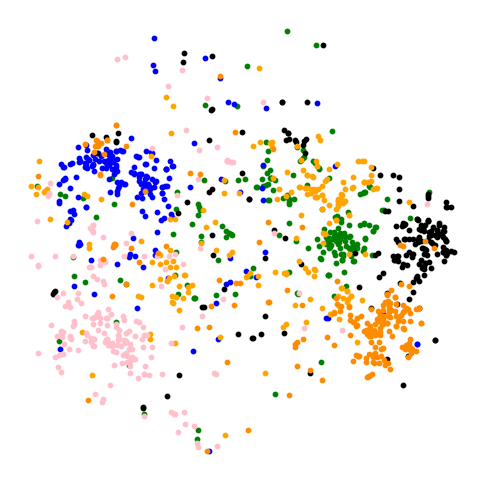

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(x_embeddings.detach().cpu())

x_min, x_max = tsne_proj.min(0), tsne_proj.max(0)
X_norm = (tsne_proj - x_min) / (x_max - x_min)  
plt.figure(figsize=(6, 6))

# customize your marker
# colors = ['b','g','c','m','k']
# markers = ['.','^']
msize = 40
y = [data[i]['label'] for i in range(len(data))]
print(y)
for i in range(tsne_proj.shape[0]):
    if y[i]== "30": # live
        a = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="g", s=msize, marker='.')
    # elif y[i]== "12": # print
    #     b = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="r", s=msize, marker='.')
    elif y[i]== "13": # print
        c = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="b", s=msize, marker='.')
    # elif y[i]== "34": # print
    #     d = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="purple", s=msize, marker='.')
    # elif y[i]== "6": # print
    #     e = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="y", s=msize, marker='.')
    elif y[i]== "28": # print
        f = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    elif y[i]== "9": # print
        g = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="orange", s=msize, marker='.')
    elif y[i]== "5": # print
        h = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="pink", s=msize, marker='.')
    # elif y[i]== "7": # print
    #     j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="brown", s=msize, marker='.')
    # elif y[i]== "23": # print
    #     j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="gray", s=msize, marker='.')
    # elif y[i]== "37": # print
    #     j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="black", s=msize, marker='.')
    # elif y[i]== "36": # print
    #     j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="plum", s=msize, marker='.')
    # elif y[i]== "27": # print
    #     j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="yellowgreen", s=msize, marker='.')
    elif y[i]== "25": # print
        j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="darkorange", s=msize, marker='.')
    # elif y[i]== "33": # print
    #     j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="darkgray", s=msize, marker='.')
    # elif y[i]== "22": # print
    #     j = plt.scatter(tsne_proj[i, 0], tsne_proj[i, 1], color="darkred", s=msize, marker='.')
# plt.legend((a, b, c, d, f, g, h, j),
#            ('30', '12', '13', '34', '6', '28', '9', '5'),
#            scatterpoints=1,
#            loc='upper right',
#            ncol=2,
#            fontsize=8)

plt.xticks([])
plt.yticks([])
plt.axis("off")
